# Web Scraping: Extracting and Analyzing Quotes

## **Objective:**  
Scrape data from a website and perform analysis on the scraped data.

In this lab, you will scrape quotes, authors, and tags from [quotes.toscrape.com](http://quotes.toscrape.com), store the data in a CSV file, and analyze the results.

## **Tasks Covered:**
1. Send HTTP requests to fetch web pages.
2. Parse HTML using BeautifulSoup.
3. Extract quotes, authors, and tags.
4. Handle pagination to scrape multiple pages.
5. Store the extracted data in a CSV file using Pandas.
6. Perform basic analysis:
   - Count the total number of quotes.
   - Identify the top 5 authors with the most quotes.
   - Identify the top 5 most frequent tags.
7. Visualize the analysis using matplotlib.

## **Prerequisites:**  
- Python 3.7+  
- Install required libraries:
  - `pip install requests beautifulsoup4 pandas matplotlib`

## **Instructions:**

1. **Fetch the Web Pages:**
   - Use the `requests` library to send an HTTP GET request to `http://quotes.toscrape.com`.
   - Handle pagination by following the “Next” page links.

2. **Parse and Extract Data:**
   - Use BeautifulSoup to parse the HTML content.
   - For each quote block, extract:
     - The quote text
     - The author’s name
     - The associated tags
   - Append the extracted information as a dictionary to a list.

3. **Save Data to CSV:**
   - Convert your list of dictionaries into a Pandas DataFrame.
   - Save the DataFrame as `quotes.csv`.

4. **Analyze the Scraped Data:**
   - Load the CSV file using Pandas.
   - Count and display the total number of quotes.
   - Compute and display the top 5 authors by the number of quotes.
   - Compute and display the top 5 most frequent tags (you may need to split and explode the tags column).

5. **Visualize the Results:**
   - Create bar charts for the top authors and tags using matplotlib.

---

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [12]:


base_url = "http://quotes.toscrape.com"
url = base_url


In [13]:
all_quotes = []

# Loop through all pages
while url:

    response = requests.get(url)

    if response.status_code == 200:
        html_content = response.text
    else:
        # Handle error
        print("Failed to retrieve the web page.")

    soup = BeautifulSoup(response.text, "html.parser")

    # Extract quote blocks
    quotes = soup.find_all("div", class_="quote")
    #code here
    for quote in quotes:
        quote_text = quote.find("span", class_="text").text
        author = quote.find("small", class_="author").text
        tags = [tag.text for tag in quote.find_all("a", class_="tag")]
        all_quotes.append({"quote": quote_text, "author": author, "tags": tags})

    next_button = soup.find("li", class_="next")
    if next_button:
        next_page = next_button.find("a")
        if next_page:
            url = base_url + next_page["href"]
    else:
      url = None

for quote in all_quotes:
    print(f'Quote; {quote}')
    # Check for next page
    #code here


Quote; {'quote': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}
Quote; {'quote': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling', 'tags': ['abilities', 'choices']}
Quote; {'quote': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'author': 'Albert Einstein', 'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']}
Quote; {'quote': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', 'author': 'Jane Austen', 'tags': ['aliteracy', 'books', 'classic', 'humor']}
Quote; {'quote': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", 'author': 'Marilyn Monroe', 't

In [14]:


# Save scraped data to CSV
df = pd.DataFrame(all_quotes)
df.to_csv("quotes.csv", index=False)
print("Saved", len(df), "quotes to quotes.csv")


Saved 100 quotes to quotes.csv


In [15]:

# Basic Analysis
print("Total quotes:", len(df))


Total quotes: 100


In [16]:

# Find top 5 Authors
Top_Authors= df['author'].value_counts().head(5)
print('Top Authors;', Top_Authors)
#Code here




Top Authors; author
Albert Einstein    10
J.K. Rowling        9
Marilyn Monroe      7
Dr. Seuss           6
Mark Twain          6
Name: count, dtype: int64


In [17]:
# Find Top 5 Tags (split and explode the tags column)
df['tags'] = df['tags'].apply(lambda x: ', '.join(x))
top_tags = df['tags'].value_counts().head(5)
print('Top Tags;', top_tags)
#Code here
#top_tags = df['tags'].value_counts()

Top Tags; tags
love                    4
humor                   3
inspirational           3
                        3
attributed-no-source    3
Name: count, dtype: int64


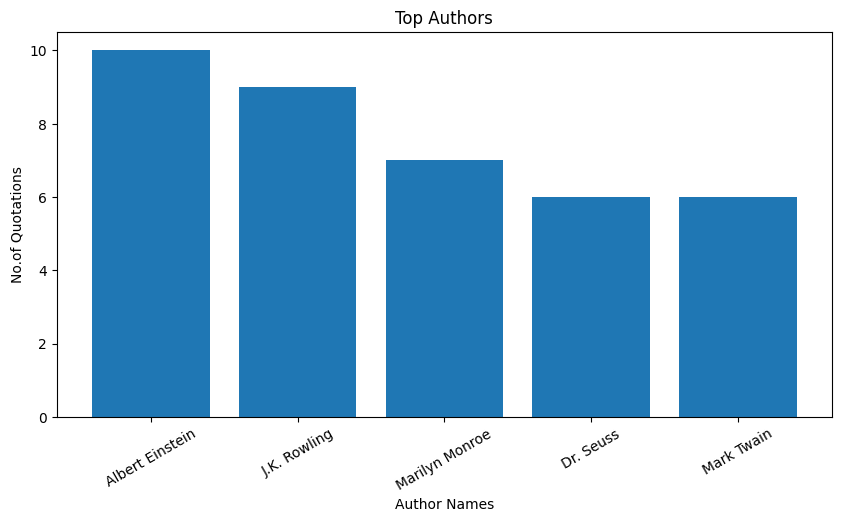

In [21]:

# Visualization: Create bar charts for the top authors and tags using matplotlib
plt.figure(figsize=(10,5))
plt.bar(Top_Authors.index, Top_Authors.values)
plt.title('Top Authors')
plt.xlabel('Author Names')
plt.ylabel('No.of Quotations')
plt.xticks(rotation = 30)
plt.show()

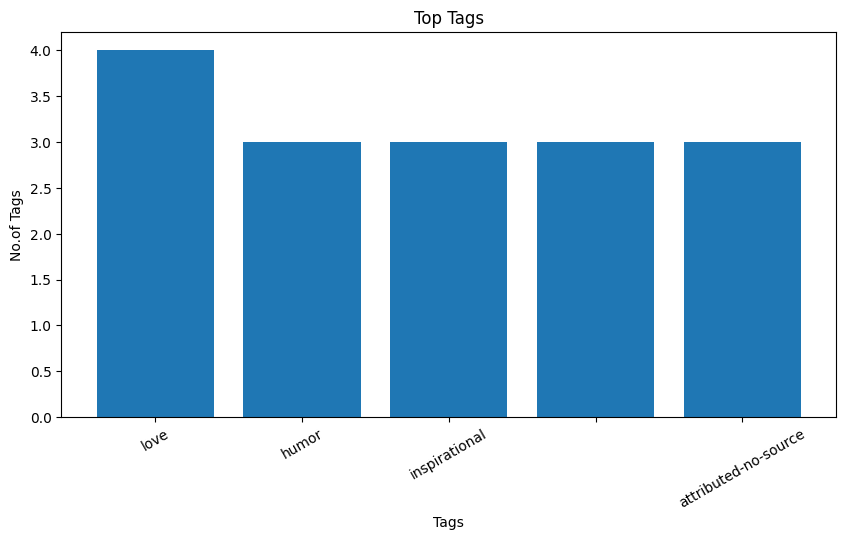

In [20]:
plt.figure(figsize=(10,5))
plt.bar(top_tags.index, top_tags.values)
plt.title('Top Tags')
plt.xlabel('Tags')
plt.ylabel('No.of Tags')
plt.xticks(rotation = 30)
plt.show()